<a href="https://colab.research.google.com/github/abhinavbenagi/Mall-Customers-Kmeans-Cluster/blob/main/mall_customers_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [55]:
df= pd.read_csv('/content/Mall_Customers.csv')

In [56]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [57]:
df.shape

(200, 5)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [59]:
X=df.iloc[:,[3,4]].values

In [60]:
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

In [61]:
from sklearn.cluster import KMeans
wcss=[]

In [62]:
for i in range(1,11):
  kmeans= KMeans(n_clusters=i, init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Elbow is formed at 5 so we keep number of clusters =5

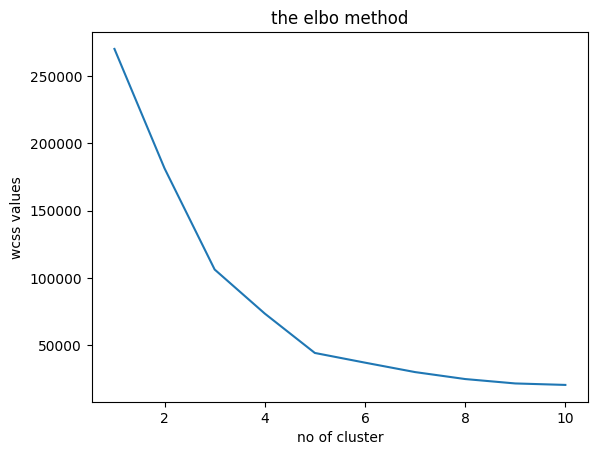

In [63]:
plt.plot(range(1,11),wcss)
plt.title("the elbo method")
plt.xlabel("no of cluster")
plt.ylabel('wcss values')
plt.show()

In [67]:
kmeansmodel =KMeans(n_clusters=5,init='k-means++',random_state=0)


In [70]:
y_means = kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


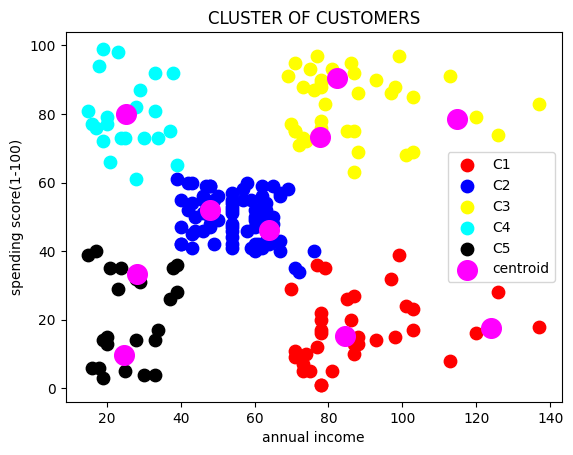

In [74]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1] ,s=80 ,c="red",label ='C1' )
plt.scatter(X[y_means == 1,0],X[y_means == 1,1] ,s=80 ,c="blue",label ='C2' )
plt.scatter(X[y_means == 2,0],X[y_means == 2,1] ,s=80 ,c="yellow",label ='C3' )
plt.scatter(X[y_means == 3,0],X[y_means == 3,1] ,s=80 ,c="cyan",label ='C4' )
plt.scatter(X[y_means == 4,0],X[y_means == 4,1] ,s=80 ,c="black",label ='C5' )

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200 ,c="magenta",label="centroid")

plt.title("CLUSTER OF CUSTOMERS")
plt.xlabel("annual income")
plt.ylabel('spending score(1-100)') 
plt.legend()
plt.show()